This notebook is about creating functions for the USvideos EDA. It goes through some basic data preprocessing like formatting datetime features, processing category_id and splitting dataset based on last and first trending date. It then heads into creating functions and basic documentation for explaining the parameters in the functions and how they can be used. 

These functions are pretty universal and can be applied to any of the csv files in the YouTube dataset. I'll be going into a more in depth analysis in my next notebook.

In [1]:
import numpy as np 
import pandas as pd
import json

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('../input/youtube-new/USvideos.csv')

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Data Preprocessing

### Converting date and time columns to datetime

In [4]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [5]:
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [6]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [7]:
df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [8]:
df.insert(5, 'publish_date', df['publish_time'].dt.date)

In [9]:
df['publish_time'] = df['publish_time'].dt.time

In [10]:
df['publish_date'] = pd.to_datetime(df['publish_date'])

### Processing category_id

In [11]:
id_to_cat = {}

with open('../input/youtube-new/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_cat[category['id']] = category['snippet']['title']

In [12]:
id_to_cat

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [13]:
df['category_id'] = df['category_id'].astype(str)

In [14]:
df.insert(5, 'category', df['category_id'].map(id_to_cat))

### Duplicated entries

In [15]:
df['video_id'].nunique()

6351

In [16]:
len(df['video_id'])

40949

Out of 40949 videos, only 6351 are unique as these videos were trending on multiple days.

In [17]:
print(df.shape)
df_last = df.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
df_first = df.drop_duplicates(subset=['video_id'], keep='first', inplace=False)
print(df_last.shape)
print(df_first.shape)

(40949, 18)
(6351, 18)
(6351, 18)


In [18]:
print(df['video_id'].duplicated().any())
print(df_last['video_id'].duplicated().any())
print(df_first['video_id'].duplicated().any())

True
False
False


df has a lot of repetitions as many videos were trending for multiple days. We split the df into df_last to keep the updated stats on the last day it was trending and df_first for the first day it was trending.

In [19]:
df_last.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sports,2017-11-13,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News & Politics,2017-11-12,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


# Functions

### Documentation

Functions:
- top_10 ( df, col, num=10 )
- bottom_10 ( df, col, num=10 )
- channel_stats ( df, channel, num=5, arrange_by='views' )
- find_videos_by_trending_date ( df, date, num=5, arrange_by='views', category=False )
- find_videos_by_publish_date ( df, date, num=5, arrange_by='views', publish_to_trend_time=False )
- find_videos_by_category ( df, cat, num=5, arrange_by='views' )

Parameters:
- df: The dataframe that you wsih to extract the data from. It could be the entire dataframe or the dataframes created based on first and last trending dates.
- col: views, likes, dislikes, comment_count
    - Prescribe the parameter based on which the top_10 and bottom_10 function will parse the data
- num: (default=10 or 5)
    - The number of observations you wish to view
- channel: (for channel_stats) 
    - The channel_title for which you would like to see the stats
- arrange_by: views, likes, dislikes, comment_count (default='views')
    - The parameter based on which you would like to arrange the data
- category: boolean, optional (default=False)
    - Set True to print category with the highest number of trending videos on that date
- publish_to_trend_time: boolean, optional (default=False)
    - Set True to include a column in the df with the number of days it to took for the video to trend

### Visualize top 10 by feature

We'll be using df_last for all these functions as df_last has all the videos with the updates stats while it was trending. Though you can use any dataframe and plug it into these functions for data analysis

In [20]:
def top_10(df, col, num=10):
    sort_df = df.sort_values(col, ascending=False).iloc[:num]
    
    ax = sort_df[col].plot.bar()
   
    labels = []
    for item in sort_df['title']:
        labels.append(item[:10] + '...')
        
    ax.set_title(col.upper(), fontsize=16)
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    return sort_df[['video_id', 'title', 'channel_title', col]]

,video_id,title,channel_title,views
38547,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923
6181,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,149376127
34708,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,148689896
34888,zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,139334502
38273,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,123010920
34747,M4ZoCHID9GI,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,122544931
2587,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,102012605
40869,xTlNMmZKwpA,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,94254507
4997,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,91933007
25947,-BQJo3vK8O8,Maluma - El Préstamo (Official Video),MalumaVEVO,87264467


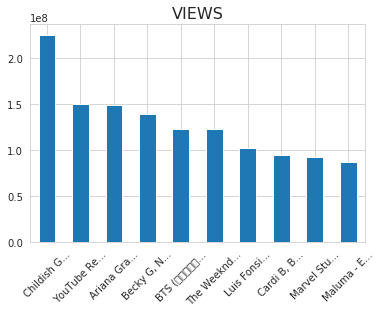

In [21]:
top_10(df_last, 'views', 10)

,video_id,title,channel_title,comment_count
11323,QwZT7T-TXT0,So Sorry.,Logan Paul Vlogs,1361580
38273,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,1228655
6181,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,810698
15571,oWjxSkJpxFU,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,658130
3581,kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,546100
38547,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,517232
22040,OK3GJ0WIQ8s,j-hope 'Daydream (백일몽)' MV,ibighit,477233
17063,_5d-sQ7Fh5M,LOGAN PAUL IS BACK!,Logan Paul Vlogs,436698
30249,FhllRWReNEE,Melting Every Lipstick From Sephora Together,Safiya Nygaard,383762
35080,p8npDG2ulKQ,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,371864


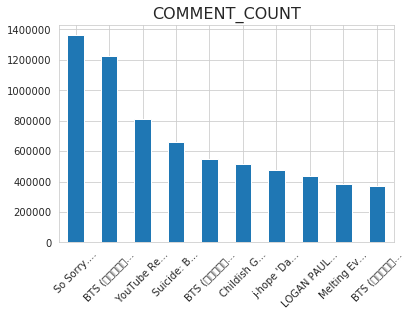

In [22]:
top_10(df_last, 'comment_count')

### Visualize bottom 10 by feature

In [23]:
def bottom_10(df, col, num=10):
    sort_df = df.sort_values(col, ascending=True).iloc[:num]
    
    ax1 = sort_df[col].plot.bar()
    
    labels = []
    for item in sort_df['title']:
        labels.append(item[:10] + '...')
        
    ax1.set_title('Bottom {} {} for videos'.format(num, col))
    ax1.set_xticklabels(labels, rotation=45)
    
    return sort_df[['title', 'channel_title', col]]

,title,channel_title,views
14782,"1 dead, others injured after Ky. school shooting",Newsy,559
777,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,704
14984,Artwork Forge,Palo Alto Online,745
12716,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,748
160,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,773
13398,Bannon Arrives to Testify on Capitol Hill,Associated Press,835
11329,OjO Commuter Scooter®- Light Electric Vehicle ...,OjO Commuter Scooter by OjO Electric,917
12371,UR EEOC Complainants Press Conference (5pm Jan...,University of Rochester EEOC Complainants,988
1583,John Thrasher: Jimbo's here forever,Single Shot,1032
11357,Gas Mask Scene | Kong: Skull Island (2017),Adam Whitley,1082


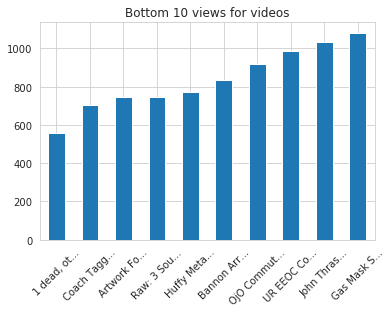

In [24]:
bottom_10(df_last, 'views')

### Function to display channel stats

In [25]:
def channel_stats(df, channel, num=5, arrange_by='views'):
    target_df = df.loc[df['channel_title'] == channel].sort_values(arrange_by, ascending=False)[:num]
    
    ax1 = target_df[['views']].plot.bar()
    
    ax2 = target_df[['likes', 'dislikes', 'comment_count']].plot.bar()
    
    labels = []
    for item in target_df['title']:
        labels.append(item[:15] + '...')
    
    ax1.set_title('Top {} views for channel {} arranged by {}'.format(num, channel, arrange_by))
    ax1.set_xticklabels(labels, rotation=45)
    
    ax2.set_title('Top {} Likes/Dislikes/Comments for channel {} arranged by {}'.format(num, channel, arrange_by))
    ax2.set_xticklabels(labels, rotation=45)
    
    return df.loc[df['channel_title'] == channel]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
6978,khPLWaBioOs,2017-12-18,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,24,Entertainment,2017-12-10,21:32:44,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",18938867,1013411,140271,175929,https://i.ytimg.com/vi/khPLWaBioOs/default.jpg,False,False,False,MAVERICK MERCH IS WHERE IT'S AT ► https://Shop...
11323,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,24,Entertainment,2018-01-02,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
15571,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,Nonprofits & Activism,2018-01-24,18:30:01,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...
17063,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,24,Entertainment,2018-02-04,22:02:27,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",14161833,1216340,291900,436698,https://i.ytimg.com/vi/_5d-sQ7Fh5M/default.jpg,False,False,False,Do It Different. Be a Maverick ► https://ShopL...


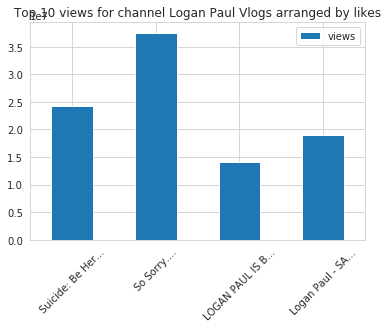

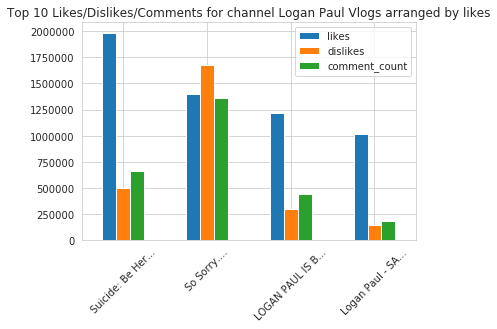

In [26]:
channel_stats(df_last, 'Logan Paul Vlogs', num=10, arrange_by='likes')

### Function to find videos by trending date

In [27]:
def find_videos_by_trending_date(df, date, num=10, arrange_by='views', category=False):
    
    target_df = df.loc[df['trending_date'] == date][:num].sort_values(arrange_by, ascending=False)
    
    if category==True:
        cat_target = df.loc[df['trending_date'] == date].sort_values(arrange_by, ascending=False)
        cat = cat_target.groupby(['category'])['video_id'].count().sort_values(ascending=False).head()
        print('The categories with the most videos on this trending date:', cat)
    
    ax1 = target_df[['views']].plot.bar()
    
    ax2 = target_df[['likes', 'dislikes', 'comment_count']].plot.bar()
    
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
        
    ax1.set_title('Top {} views for videos trending on date {} arranged by {}'.format(num, date, arrange_by))
    ax1.set_xticklabels(labels, rotation=45)
    
    ax2.set_title('Top {} likes/dislikes/comments for videos trending on date {} arranged by {}'.format(num, date, arrange_by))
    ax2.set_xticklabels(labels, rotation=45)
    
    return target_df

The categories with the most videos on this trending date: category
Entertainment     18
Music             14
People & Blogs     6
Howto & Style      6
Sports             4
Name: video_id, dtype: int64


,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,Film & Animation,2017-11-12,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sports,2017-11-13,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,News & Politics,2017-11-12,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...


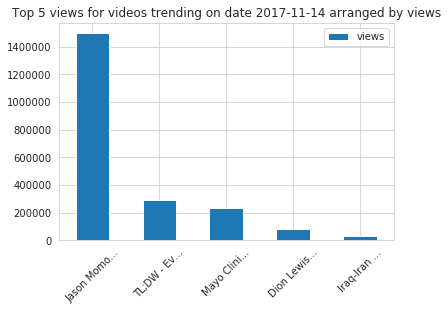

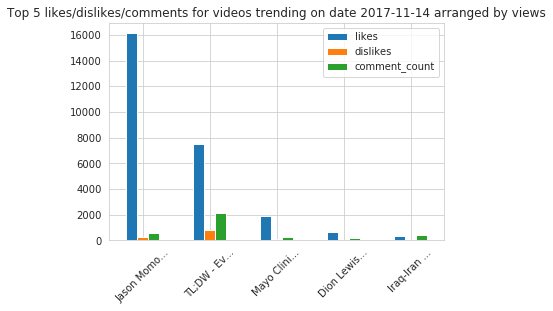

In [28]:
find_videos_by_trending_date(df_last, '2017-11-14', 5, category=True)

### Function to find videos by publish date

In [29]:
def find_videos_by_publish_date(df, date, num=5, arrange_by='views', publish_to_trend_time=False):
    
    target_df = df.loc[df['publish_date'] == date][:num].sort_values(arrange_by, ascending=False)
    
    if publish_to_trend_time==True:
        target_df.insert(6, 'publish_to_trend_time', target_df['trending_date'] - target_df['publish_date'])
    
    ax1 = target_df[['views']].plot.bar()
    
    ax2 = target_df[['likes', 'dislikes', 'comment_count']].plot.bar()
    
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
        
    ax1.set_title('Top {} views for videos published on date {} arranged by {}'.format(num, date, arrange_by))
    ax1.set_xticklabels(labels, rotation=45)
    
    ax2.set_title('Top {} likes/dislikes/comments for videos published on date {} arranged by {}'.format(num, date, arrange_by))
    ax2.set_xticklabels(labels, rotation=45
                       )
    return target_df

,video_id,trending_date,title,channel_title,category_id,category,publish_to_trend_time,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
423,kgaO45SyaO4,2017-11-16,The New SpotMini,BostonDynamics,28,Science & Technology,3 days,2017-11-13,20:09:58,"Robots|""Boston Dynamics""|""SpotMini""|""Legged Lo...",5531707,72727,3362,14816,https://i.ytimg.com/vi/kgaO45SyaO4/default.jpg,False,False,False,For more information . . . stay tuned.
225,jr9QtXwC9vc,2017-11-15,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,Film & Animation,2 days,2017-11-13,14:00:23,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",2671756,12699,505,1010,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
242,TUmyygCMMGA,2017-11-15,Why the rise of the robots won’t mean the end ...,Vox,25,News & Politics,2 days,2017-11-13,13:45:16,"vox.com|""vox""|""explain""|""shift change""|""future...",635985,20721,2417,4111,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."
487,KhdecX0qjNA,2017-11-16,Demi Lovato - Sorry Not Sorry in the Live Lounge,BBCRadio1VEVO,10,Music,3 days,2017-11-13,20:11:43,"Demi Lovato|""Sorry Not Sorry""|""Live Lounge""|""B...",157522,8012,85,286,https://i.ytimg.com/vi/KhdecX0qjNA/default.jpg,False,False,False,Demi Lovato performs Sorry Not Sorry in the BB...
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,Sports,1 days,2017-11-13,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...


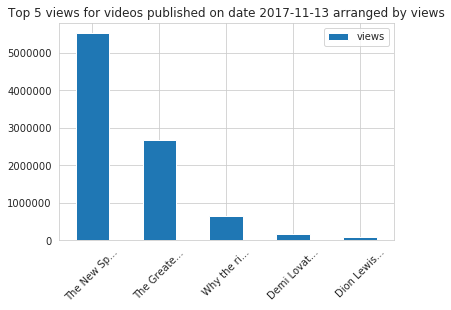

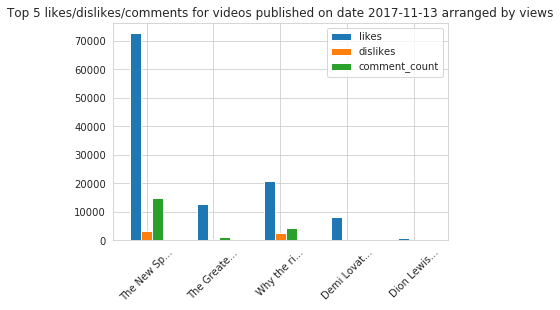

In [30]:
find_videos_by_publish_date(df_last, '2017-11-13', publish_to_trend_time=True)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,Science & Technology,2017-11-10,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


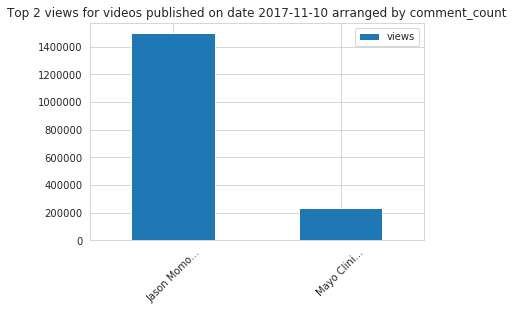

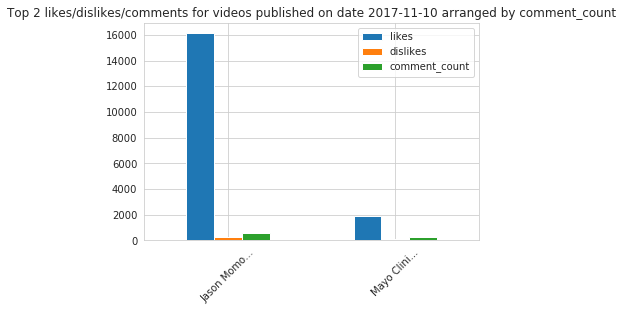

In [31]:
find_videos_by_publish_date(df_last, '2017-11-10', 2, 'comment_count')

### Find videos by Category

In [32]:
def find_videos_by_category(df, cat, num=5, arrange_by='views'):
    
    target_df = df.loc[df['category'] == cat][:num].sort_values(arrange_by, ascending=False)
    
    ax1 = target_df[['views']].plot.bar()
    
    ax2 = target_df[['likes', 'dislikes', 'comment_count']].plot.bar()
    
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
        
    ax1.set_title('Top {} views for videos in category {} arranged by {}'.format(num, cat, arrange_by))
    ax1.set_xticklabels(labels, rotation=45)
    
    ax2.set_title('Top {} likes/dislikes/comments for videos in category {} arranged by {}'.format(num, cat, arrange_by))
    ax2.set_xticklabels(labels, rotation=45)
    
    return target_df

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
78,cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,24,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,Entertainment,2017-11-10,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
117,dW4wpGg64pE,2017-11-14,Meryl Streep Meets Anna Wintour at Vogue,Vogue,24,Entertainment,2017-11-09,18:20:27,"anna wintour|""meryl streep""|""meryl streep inte...",1017803,25122,628,1504,https://i.ytimg.com/vi/dW4wpGg64pE/default.jpg,False,False,False,The pair had a frank and far-ranging conversat...
106,yuBqWcSKrCk,2017-11-14,"Owen Wilson on Meeting Julia Roberts, and Tand...",TheEllenShow,24,Entertainment,2017-11-10,14:00:10,"owen wilson|""owen""|""wilson""|""julia roberts""|""t...",304926,3305,130,275,https://i.ytimg.com/vi/yuBqWcSKrCk/default.jpg,False,False,False,"Movie star Owen Wilson was back on the show, a..."
139,vd4zwINEcLY,2017-11-14,Live in the now!,poofables,24,Entertainment,2011-03-27,04:31:25,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fende...",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo..."


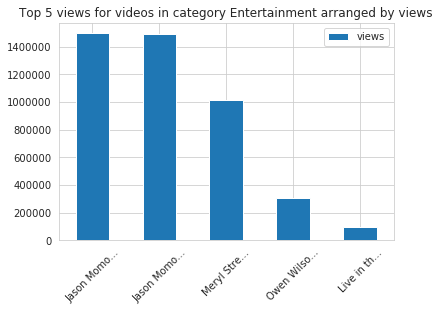

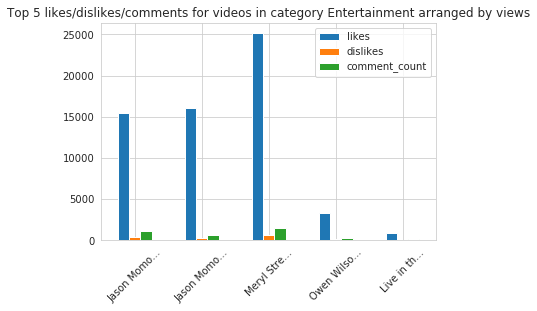

In [33]:
find_videos_by_category(df_last, 'Entertainment', 5)